In [1]:
import cv2

imagePath = 'Image detection/testimg.jpg'

In [17]:
img = cv2.imread(imagePath,0)

In [18]:
print(img)

[[126 124 122 ... 171 184 184]
 [124 123 122 ... 166 182 185]
 [124 124 124 ... 165 180 181]
 ...
 [ 37  34  30 ... 166 165 164]
 [ 28  25  24 ... 165 164 164]
 [ 29  27  26 ... 164 163 163]]


In [19]:
img.shape

(720, 1280)

In [22]:
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [21]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [23]:
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [24]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [25]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 1279.5, 719.5, -0.5)

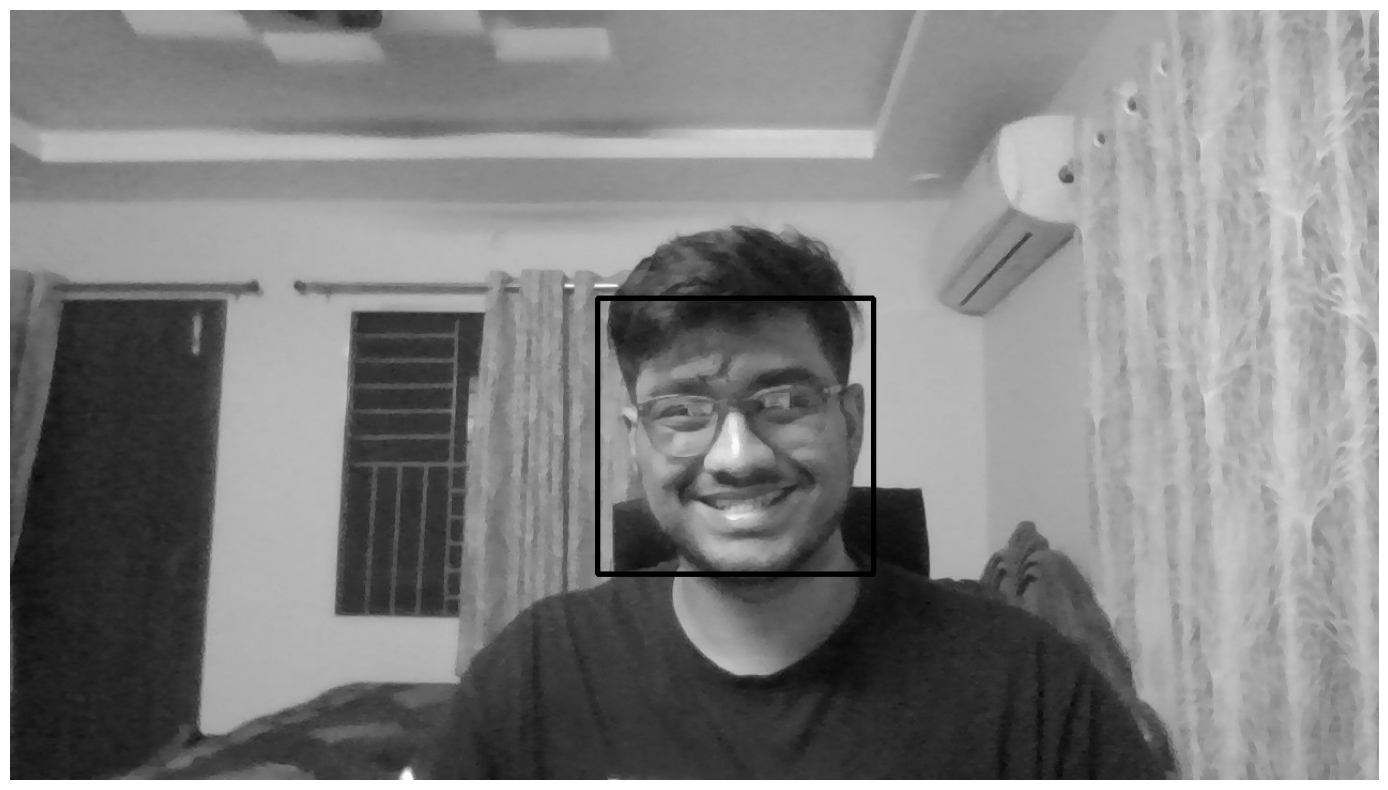

In [26]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [42]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [48]:
video_capture = cv2.VideoCapture(0);

In [49]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [50]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()